In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import seaborn as sns
import warnings
import pandas_profiling
warnings.filterwarnings('ignore')

## Problem Statement
All the patients suffered heart attacks at some point in the past. Some are still alive and some are not. The survival and still-alive variables, when taken together, indicate whether a patient survived for at least one year following the heart attack.

The problem addressed by past researchers was to predict from the other variables whether or not the patient will survive at least one year. The most difficult part of this problem is correctly predicting that the patient will NOT survive. (Part of the difficulty seems to be the size of the data set.)

In [231]:
df = pd.read_csv("Echocardiogram.data", error_bad_lines=False,header=None,sep=",")
df.head()

b'Skipping line 50: expected 13 fields, saw 14\n'


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,11,0,71,0,0.260,9,4.600,14,1,1,name,1,0
1,19,0,72,0,0.380,6,4.100,14,1.700,0.588,name,1,0
2,16,0,55,0,0.260,4,3.420,14,1,1,name,1,0
3,57,0,60,0,0.253,12.062,4.603,16,1.450,0.788,name,1,0
4,19,1,57,0,0.160,22,5.750,18,2.250,0.571,name,1,0


In [232]:
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64')

In [233]:
df=df.rename(columns={0: "Survival(in months)", 1: "Still Alive",2: "Age at heart attack",3: "pericardial-effusion",4: " fractional-shortening",5: "epss",6: "lvdd",7: "wall-motion-score",8: "wall-motion-index",9: "mult",10: "name",11: "group",12: "alive-at-1"})

In [234]:
df.head(5)

,Survival(in months),Still Alive,Age at heart attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score,wall-motion-index,mult,name,group,alive-at-1
0,11,0,71,0,0.260,9,4.600,14,1,1,name,1,0
1,19,0,72,0,0.380,6,4.100,14,1.700,0.588,name,1,0
2,16,0,55,0,0.260,4,3.420,14,1,1,name,1,0
3,57,0,60,0,0.253,12.062,4.603,16,1.450,0.788,name,1,0
4,19,1,57,0,0.160,22,5.750,18,2.250,0.571,name,1,0


In [186]:
df.shape

(131, 13)

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Survival(in months)     131 non-null    object
 1   Still Alive             131 non-null    int64 
 2   Age at heart attack     131 non-null    object
 3   pericardial-effusion    131 non-null    int64 
 4    fractional-shortening  131 non-null    object
 5   epss                    131 non-null    object
 6   lvdd                    131 non-null    object
 7   wall-motion-score       131 non-null    object
 8   wall-motion-index       131 non-null    object
 9   mult                    131 non-null    object
 10  name                    131 non-null    object
 11  group                   131 non-null    object
 12  alive-at-1              131 non-null    object
dtypes: int64(2), object(11)
memory usage: 13.4+ KB


In [235]:
# As mentioned we do not need these three columns
df=df.drop(["name","group","wall-motion-score"], axis=1)
df.shape

(131, 10)

In [237]:
df.columns

Index(['Survival(in months)', 'Still Alive', 'Age at heart attack',
       'pericardial-effusion', ' fractional-shortening', 'epss', 'lvdd',
       'wall-motion-index', 'mult', 'alive-at-1'],
      dtype='object')

In [238]:
for i in df.columns.tolist():
    df[i]=pd.to_numeric(df[i], errors='coerce')

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Survival(in months)     130 non-null    float64
 1   Still Alive             131 non-null    int64  
 2   Age at heart attack     126 non-null    float64
 3   pericardial-effusion    131 non-null    int64  
 4    fractional-shortening  124 non-null    float64
 5   epss                    117 non-null    float64
 6   lvdd                    121 non-null    float64
 7   wall-motion-index       130 non-null    float64
 8   mult                    128 non-null    float64
 9   alive-at-1              74 non-null     float64
dtypes: float64(8), int64(2)
memory usage: 10.4 KB


In [240]:
df.drop(df[df["Survival(in months)"]<12].index, inplace = True)  #Point number 2 of the problem statement

In [241]:
df.shape

(93, 10)

In [242]:
df.head()

,Survival(in months),Still Alive,Age at heart attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-index,mult,alive-at-1
1,19.0,0,72.0,0,0.380,6.000,4.100,1.70,0.588,0.0
2,16.0,0,55.0,0,0.260,4.000,3.420,1.00,1.000,0.0
3,57.0,0,60.0,0,0.253,12.062,4.603,1.45,0.788,0.0
4,19.0,1,57.0,0,0.160,22.000,5.750,2.25,0.571,0.0
5,26.0,0,68.0,0,0.260,5.000,4.310,1.00,0.857,0.0


In [243]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Survival(in months),92.0,30.211957,11.351583,12.000,22.00,29.0000,36.250,57.00
Still Alive,93.0,0.096774,0.297252,0.000,0.00,0.0000,0.000,1.00
Age at heart attack,90.0,61.300000,7.944258,35.000,57.00,61.0000,65.000,81.00
pericardial-effusion,93.0,0.150538,0.359536,0.000,0.00,0.0000,0.000,1.00
fractional-shortening,90.0,0.230056,0.110800,0.030,0.15,0.2185,0.290,0.61
epss,85.0,10.973471,7.018651,0.000,6.00,9.4000,13.200,31.00
lvdd,89.0,4.633393,0.793993,2.320,4.16,4.5100,5.200,6.74
wall-motion-index,93.0,1.274247,0.349541,1.000,1.00,1.1400,1.409,2.39
mult,92.0,0.784793,0.196385,0.357,0.71,0.7860,0.857,2.00
alive-at-1,49.0,0.020408,0.142857,0.000,0.00,0.0000,0.000,1.00


## Feature Engineering

### Checking for null values

In [244]:
df.isnull().sum()

Survival(in months)        1
Still Alive                0
Age at heart attack        3
pericardial-effusion       0
 fractional-shortening     3
epss                       8
lvdd                       4
wall-motion-index          0
mult                       1
alive-at-1                44
dtype: int64

#### 44/93=47.3%  records do not have any value for their  output feature 

##### We shall use the first two columns to predict the O/P here

In [245]:
df[df["alive-at-1"].isnull()].head()

,Survival(in months),Still Alive,Age at heart attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-index,mult,alive-at-1
24,48.0,0,64.0,0,0.19,5.90,3.48,1.110,0.640,NaN
25,29.0,0,54.0,0,0.30,7.00,3.85,1.667,0.430,NaN
26,29.0,0,35.0,0,0.30,5.00,4.17,1.000,1.000,NaN
27,29.0,0,55.0,0,NaN,7.00,NaN,1.000,2.000,NaN
33,27.0,0,47.0,0,0.40,5.12,3.10,1.000,0.857,NaN


In [246]:
indices=df[(df["Survival(in months)"]>=12) & (df["Still Alive"]==1)].index

In [247]:
for i in indices.tolist():
    df['alive-at-1'][i]=1

In [248]:
indices=df[(df["Survival(in months)"]>=12) & (df["Still Alive"]==0)].index

In [249]:
for i in indices.tolist():
    df['alive-at-1'][i]=0

### Checking whether the target class is balanced or not

In [250]:
df["alive-at-1"].value_counts()

0.0    84
1.0     9
Name: alive-at-1, dtype: int64

[Text(0, 0, 'Dead or no followup'), Text(0, 0, 'Alive')]

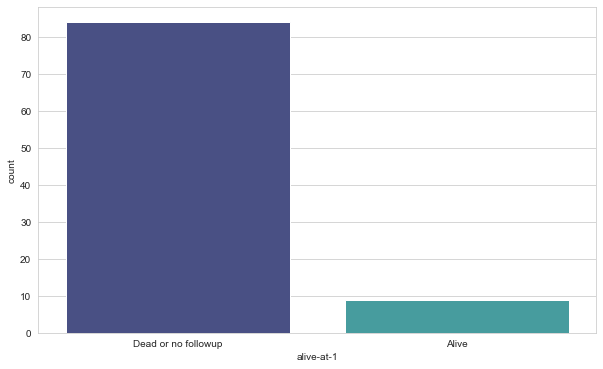

In [251]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
plot=sns.countplot(x="alive-at-1",data=df,palette="mako")
plot.set_xticklabels(["Dead or no followup","Alive"])

#### Seems to be very unblanced going ahead with Over Sampling Technique

### Over Sampling

In [252]:
X=df[['Survival(in months)',
 'Still Alive',
 'Age at heart attack',
 'pericardial-effusion',
 ' fractional-shortening',
 'epss',
 'lvdd',
 'wall-motion-index',
 'mult']]
Y=df['alive-at-1']

In [253]:
print(X.shape)
print(Y.shape)

(93, 9)
(93,)


In [254]:
## RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [255]:
os =RandomOverSampler(sampling_strategy=0.8)
# Ratio factor of 1 means since 0 has 50 and 1 has 24 , it find the class with majority count and since the ratio factor is 0.8 it means it will find the total 80%  of the majority class here 84 and will decide the amount of points to be added to other class to make it totally balance from 9 to 67

In [256]:
X_train_res, y_train_res = os.fit_resample(X, Y)

In [263]:
X_train_res.shape,y_train_res.shape  # Original 93 points of dataset + new 58 points

((151, 10), (151,))

In [258]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0.0: 84, 1.0: 9})
Resampled dataset shape Counter({0.0: 84, 1.0: 67})


In [259]:
df=X_train_res
df['alive-at-1']=y_train_res

In [260]:
df.head()

,Survival(in months),Still Alive,Age at heart attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-index,mult,alive-at-1
0,19.0,0,72.0,0,0.380,6.000,4.100,1.70,0.588,0.0
1,16.0,0,55.0,0,0.260,4.000,3.420,1.00,1.000,0.0
2,57.0,0,60.0,0,0.253,12.062,4.603,1.45,0.788,0.0
3,19.0,1,57.0,0,0.160,22.000,5.750,2.25,0.571,1.0
4,26.0,0,68.0,0,0.260,5.000,4.310,1.00,0.857,0.0


[Text(0, 0, 'Dead or no followup'), Text(0, 0, 'Alive')]

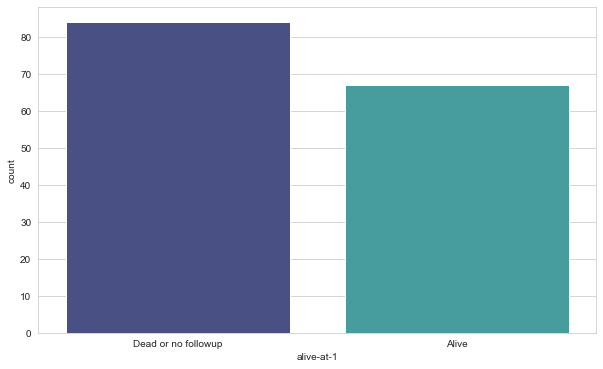

In [261]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
plot=sns.countplot(x="alive-at-1",data=df,palette="mako")
plot.set_xticklabels(["Dead or no followup","Alive"])

## Performing EDA using Panda Profiling

In [262]:
prof_report = pandas_profiling.ProfileReport(df , title = 'Echocardiogram Results')
prof_report.to_widgets()

## Feature Selection

In [274]:
df.columns

Index(['Survival(in months)', 'Still Alive', 'Age at heart attack',
       'pericardial-effusion', ' fractional-shortening', 'epss', 'lvdd',
       'wall-motion-index', 'mult', 'alive-at-1'],
      dtype='object')

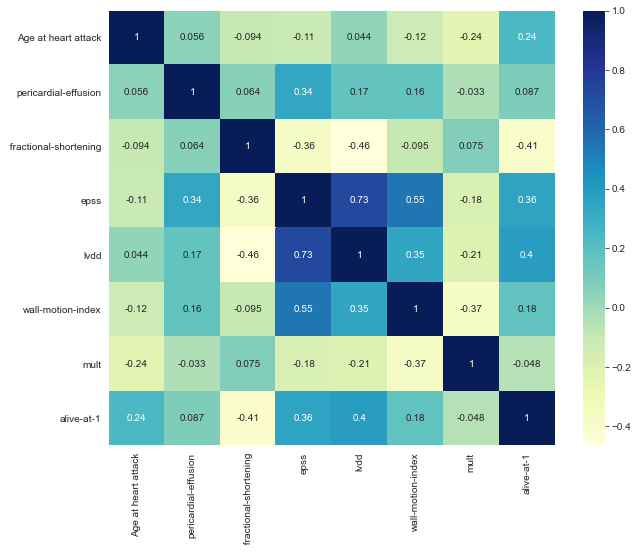

In [279]:
plt.figure(figsize=(10,8))
sns.heatmap(df[['Age at heart attack',
       'pericardial-effusion', ' fractional-shortening', 'epss', 'lvdd',
       'wall-motion-index', 'mult', 'alive-at-1']].corr(),annot=True,cmap="YlGnBu")

#### using Karl Pearson Correlation and Spearman's Rank correlation (From Panda's Profiling) we see that 
#### Age, fractional-shortening, epss, lvdd,wall-motion-index are the continuous features that affect the O/P

#### Using Filter method ( X-Square technique) - For the  categorical attribute

In [282]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df[['pericardial-effusion']]  #independent column
y = df['alive-at-1']    #target column

In [283]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=1)
fit = bestfeatures.fit(X,y)

In [284]:
dfscores = pd.DataFrame(fit.scores_)
dfpvalues=pd.DataFrame(fit.pvalues_)
dfcolumns = pd.DataFrame(X.columns)

In [285]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores,dfpvalues],axis=1)
featureScores.columns = ['Specs','Score',"P-Values"]  #naming the dataframe columns

In [286]:
featureScores

,Specs,Score,P-Values
0,pericardial-effusion,0.945711,0.330813


#### Since p-vaue > 0.05 we fail to Reject H0 at 95% significance level, Hence pericardial-effusion is associated with the O/P

In [288]:
df.columns

Index(['Survival(in months)', 'Still Alive', 'Age at heart attack',
       'pericardial-effusion', ' fractional-shortening', 'epss', 'lvdd',
       'wall-motion-index', 'mult', 'alive-at-1'],
      dtype='object')

In [289]:
x = df[['Age at heart attack',
       'pericardial-effusion', ' fractional-shortening', 'epss', 'lvdd',
       'wall-motion-index']]

In [290]:
y=df['alive-at-1']

In [291]:
df.head()

,Survival(in months),Still Alive,Age at heart attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-index,mult,alive-at-1
0,19.0,0,72.0,0,0.380,6.000,4.100,1.70,0.588,0.0
1,16.0,0,55.0,0,0.260,4.000,3.420,1.00,1.000,0.0
2,57.0,0,60.0,0,0.253,12.062,4.603,1.45,0.788,0.0
3,19.0,1,57.0,0,0.160,22.000,5.750,2.25,0.571,1.0
4,26.0,0,68.0,0,0.260,5.000,4.310,1.00,0.857,0.0


## Model Selection

Here we will be experimenting with 3 algorithms 
1. KNeighborsClassifier
2. DecisionTreeClassifier
3. RandomForestClassifier
4. XG Boost Classifier
5. SVM Classifier
6. Logistic Regression
7. Artificial Neural Network

In [423]:
from sklearn.model_selection import train_test_split

In [424]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=101)

In [425]:
mean_age=x_train["Age at heart attack"].mean()

x_train["Age at heart attack"]=x_train["Age at heart attack"].fillna(value=mean_age)
x_test["Age at heart attack"]=x_test["Age at heart attack"].fillna(value=mean_age)

In [426]:
mean_fracshorten=x_train[' fractional-shortening'].mean()

x_train[' fractional-shortening']=x_train[' fractional-shortening'].fillna(value=mean_fracshorten)
x_test[' fractional-shortening']=x_test[' fractional-shortening'].fillna(value=mean_fracshorten)

In [427]:
mean_epss=x_train['epss'].mean()

x_train['epss']=x_train['epss'].fillna(value=mean_epss)
x_test['epss']=x_test['epss'].fillna(value=mean_epss)

In [428]:
mean_lvdd=x_train['lvdd'].mean()

x_train['lvdd']=x_train['lvdd'].fillna(value=mean_lvdd)
x_test['lvdd']=x_test['lvdd'].fillna(value=mean_lvdd)

In [429]:
x_train.isnull().sum()

Age at heart attack       0
pericardial-effusion      0
 fractional-shortening    0
epss                      0
lvdd                      0
wall-motion-index         0
dtype: int64

### K Neighbors Classifier

In [292]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

In [329]:
standardScaler = StandardScaler()
columns_to_scale = ['Age at heart attack','epss', 'lvdd','wall-motion-index']
x_train[columns_to_scale] = standardScaler.fit_transform(x_train[columns_to_scale])
x_train.head()
x_test[columns_to_scale] = standardScaler.transform(x_test[columns_to_scale])

In [330]:
x_train.head()

,Age at heart attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-index
53,-0.132592,0,0.250000,-9.561612e-01,-0.466643,-0.838248
123,0.856833,1,0.160000,8.295964e-01,0.527736,-0.838248
41,0.856833,1,0.250000,-4.556080e-01,0.940984,-0.588038
21,-0.256270,0,0.610000,4.359917e-03,-0.996117,0.725565
22,-0.008914,1,0.203255,-4.806277e-16,0.605220,-0.838248


#### Filling the missing values for the required features in the original dataset just for cross validation and not for any predictive purpose

In [ ]:
mean_age=df["Age at heart attack"].mean()
df["Age at heart attack"]=df["Age at heart attack"].fillna(value=mean_age)

mean_fracshorten=df[' fractional-shortening'].mean()
df[' fractional-shortening']=df[' fractional-shortening'].fillna(value=mean_fracshorten)

mean_epss=df['epss'].mean()
df['epss']=df['epss'].fillna(value=mean_epss)

mean_lvdd=df['lvdd'].mean()
df['lvdd']=df['lvdd'].fillna(value=mean_lvdd)

In [ ]:
x_train.isnull().sum()

In [331]:
knn_scores = []
for k in range(1,20):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,x,y,cv=10)
    knn_scores.append(score.mean())

In [333]:
knn_scores

[0.9015151515151514,
 0.9106060606060605,
 0.831060606060606,
 0.7946969696969697,
 0.7075757575757576,
 0.7871212121212121,
 0.7606060606060606,
 0.7696969696969698,
 0.7431818181818183,
 0.7166666666666667,
 0.6704545454545456,
 0.5636363636363635,
 0.5636363636363636,
 0.6439393939393939,
 0.6537878787878789,
 0.6810606060606061,
 0.662878787878788,
 0.6886363636363637,
 0.6803030303030304]

In [332]:
error_rate = []

# Will take some time
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [334]:
error_rate

[0.05263157894736842,
 0.05263157894736842,
 0.15789473684210525,
 0.15789473684210525,
 0.18421052631578946,
 0.18421052631578946,
 0.18421052631578946,
 0.23684210526315788,
 0.2894736842105263,
 0.2894736842105263,
 0.2631578947368421,
 0.2631578947368421,
 0.2631578947368421,
 0.39473684210526316,
 0.42105263157894735,
 0.34210526315789475,
 0.3684210526315789,
 0.3684210526315789,
 0.39473684210526316]

#### k=2 could be an ideal choice as it gives less error rate and more accuracy

In [338]:
knnclassifier = KNeighborsClassifier(n_neighbors=2)
knnclassifier.fit(x_train,y_train)
predictions = knnclassifier.predict(x_test)
metrics.accuracy_score(y_test,predictions)

0.9473684210526315

In [339]:
print(confusion_matrix(y_test,predictions))

[[18  2]
 [ 0 18]]


In [340]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        20
         1.0       0.90      1.00      0.95        18

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



### Decision Tree

In [341]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Run the split cell again 

In [350]:
#No need for standardization for this algorithm

clf = DecisionTreeClassifier(random_state=101)
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=101)

In [351]:
pred=clf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9210526315789473

In [352]:
path = clf.cost_complexity_pruning_path(x, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [354]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.13592784482750492


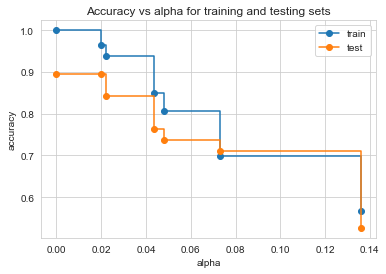

In [356]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [366]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.02)
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.02, random_state=0)

In [367]:
pred=clf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8947368421052632

In [368]:
print(confusion_matrix(y_test,pred))

[[16  4]
 [ 0 18]]


In [369]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       1.00      0.80      0.89        20
         1.0       0.82      1.00      0.90        18

    accuracy                           0.89        38
   macro avg       0.91      0.90      0.89        38
weighted avg       0.91      0.89      0.89        38



### RandomForestClassifier

In [370]:
from sklearn.ensemble import RandomForestClassifier
#Run the split cell again 

In [381]:
x_train.columns

Index(['Age at heart attack', 'pericardial-effusion', ' fractional-shortening',
       'epss', 'lvdd', 'wall-motion-index'],
      dtype='object')

In [382]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

est = RandomForestClassifier(n_jobs=-1)     #Utilizes all the cores of the CPU
rf_p_dist={'max_depth':[3,5,10,None],    #None means till full depth
              'n_estimators':[10,100,200,300,400,500],   # Number of Decision Trees
              'max_features':randint(1,7),   # AS I have 6 features
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':randint(1,4),
              }

In [383]:
def hypertuning_rscv(est, p_distr, nbr_iter,X,y):   #p_distr is the different set of parameters
    rdmsearch = RandomizedSearchCV(est, param_distributions=p_distr,
                                  n_jobs=-1, n_iter=nbr_iter, cv=9)
    rdmsearch.fit(X,y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

In [387]:
rf_parameters, rf_ht_score = hypertuning_rscv(est, rf_p_dist, 6, x, y)

In [395]:
classifier=RandomForestClassifier(n_jobs=-1, n_estimators=100,bootstrap= False,criterion='gini',max_depth=None,max_features=3,min_samples_leaf= 1)

In [396]:
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, max_features=3, n_jobs=-1)

In [397]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)

accuracy_score=accuracy_score(y_test,y_pred)
print(cm)
print(accuracy_score)

[[18  2]
 [ 0 18]]
0.9473684210526315


In [398]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        20
         1.0       0.90      1.00      0.95        18

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



### XG Boost

In [399]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [400]:
classifier=xgboost.XGBClassifier()

In [401]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [409]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [338]:
#Run the data split cell

In [419]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[11:33:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=0.3, gamma=0.0,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.2, max_delta_step=0,
                                           max_depth=3, min_child_weight=7,
                                           missing=None,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=1,
                                           nthre...
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silen

In [420]:
classifier=xgboost.XGBClassifier(max_depth=3,subsample=1,n_estimators=100,learning_rate=0.2,min_child_weight=7, random_state=0,reg_alpha=0, reg_lambda=1)

In [421]:
classifier.fit(x_train, y_train)

[11:34:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [422]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)

accuracy_score=accuracy_score(y_test,y_pred)
print(cm)
print(accuracy_score)

[[14  6]
 [ 0 18]]
0.8421052631578947


In [416]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85        20
         1.0       0.83      0.83      0.83        18

    accuracy                           0.84        38
   macro avg       0.84      0.84      0.84        38
weighted avg       0.84      0.84      0.84        38



## FINAL MODEL SELECTED- KNN Algorithm

In [430]:
knnclassifier = KNeighborsClassifier(n_neighbors=2)
knnclassifier.fit(x_train,y_train)
predictions = knnclassifier.predict(x_test)
metrics.accuracy_score(y_test,predictions)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[19  1]
 [ 0 18]]
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97        20
         1.0       0.95      1.00      0.97        18

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

